In [0]:
%tensorflow_version 2.x 


In [0]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [0]:
string = tf.Variable("This is a string", tf.string)
number = tf.Variable(768, tf.int16)
floating = tf.Variable(3.5874, tf.float64)

 Create some tensors with higher ranks

In [0]:
 rank1_tensor = tf.Variable(["Test"], tf.string)
 rank2_tensor = tf.Variable([["Test", "OK"],["Test", "YES"]], tf.string)

Determine the rank of the tensor

In [0]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

Get the shape of a tensor


In [0]:
rank2_tensor.shape

TensorShape([2, 2])

Change the shape of the tensor

In [0]:
tensor1 = tf.ones([1, 2, 3])
tensor2 = tf.reshape(tensor1, [2,3,1])
tensor3 = tf.reshape(tensor2 ,[3, -1])
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


Creating a 2D tensor

In [0]:
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]
tensor = tf.Variable(matrix, dtype = tf.int32)
print(tf.rank(tensor))
print(tensor.shape)

tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


Select some different rows and columns from our tensor

In [0]:
three = tensor[0,2]  # selects the 3rd element from the 1st row
print(three)  # -> 3

row1 = tensor[0]  # selects the first row
print(row1)

column1 = tensor[:, 0]  # selects the first column
print(column1)

row_2_and_4 = tensor[1::2]  # selects second and fourth row
print(row_2_and_4)

column_1_in_row_2_and_3 = tensor[1:3, 0]
print(column_1_in_row_2_and_3)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)
tf.Tensor(
[[ 6  7  8  9 10]
 [16 17 18 19 20]], shape=(2, 5), dtype=int32)
tf.Tensor([ 6 11], shape=(2,), dtype=int32)


Types of Tensors
1. Variable
2. Constant
3. Placeholder
4. SparseTensor





**TensorFlow Core Learning Algorithms**
The algorithms we will focus on include:

1. Linear Regression
2. Classification
3. Clustering
4. Hidden Markov Models

# **1. Linear Regression**
Linear regression follows a very simple concept. If data points are related linearly, we can generate a line of best fit for these points and use it to predict future values.

(0.0, 6.0, 0.0, 20.0)

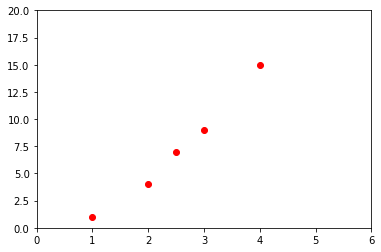

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, "ro")
plt.axis([0, 6, 0, 20])

Here's a refresher on the equation of a line in 2D.

𝑦=𝑚𝑥+𝑏 

Here's an example of a line of best fit for this graph.

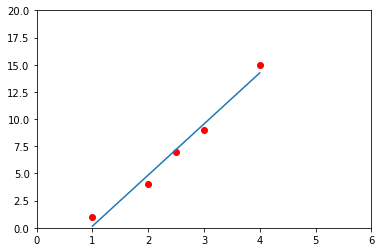

In [0]:
plt.plot(x, y, "ro")
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

# Setup and Imports
Before we get started we must install sklearn and import the following modules.

In [0]:
!pip install -q sklearn
%tensorflow_version 2.x

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

# Data

In [0]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
#print(dftrain)
#y_train = dftrain.pop("survived")
#y_eval = dfeval.pop("survived")

In [0]:
print(dftrain)
dftrain.to_csv()

     survived     sex   age  ...     deck  embark_town  alone
0           0    male  22.0  ...  unknown  Southampton      n
1           1  female  38.0  ...        C    Cherbourg      n
2           1  female  26.0  ...  unknown  Southampton      y
3           1  female  35.0  ...        C  Southampton      n
4           0    male  28.0  ...  unknown   Queenstown      y
..        ...     ...   ...  ...      ...          ...    ...
622         0    male  28.0  ...  unknown  Southampton      y
623         0    male  25.0  ...  unknown  Southampton      y
624         1  female  19.0  ...        B  Southampton      y
625         0  female  28.0  ...  unknown  Southampton      n
626         0    male  32.0  ...  unknown   Queenstown      y

[627 rows x 10 columns]


',survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone\n0,0,male,22.0,1,0,7.25,Third,unknown,Southampton,n\n1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n\n2,1,female,26.0,0,0,7.925,Third,unknown,Southampton,y\n3,1,female,35.0,1,0,53.1,First,C,Southampton,n\n4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y\n5,0,male,2.0,3,1,21.075,Third,unknown,Southampton,n\n6,1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n\n7,1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n\n8,1,female,4.0,1,1,16.7,Third,G,Southampton,n\n9,0,male,20.0,0,0,8.05,Third,unknown,Southampton,y\n10,0,male,39.0,1,5,31.275,Third,unknown,Southampton,n\n11,0,female,14.0,0,0,7.8542,Third,unknown,Southampton,y\n12,0,male,2.0,4,1,29.125,Third,unknown,Queenstown,n\n13,1,male,28.0,0,0,13.0,Second,unknown,Southampton,y\n14,0,female,31.0,1,0,18.0,Third,unknown,Southampton,n\n15,1,female,28.0,0,0,7.225,Third,unknown,Cherbourg,y\n16,0,male,35.0,0,0,26.0,Second,unknown,Southampton,y\n17,1,male,28.0,0,

In [0]:
y_train = dftrain.pop("survived")
y_eval = dfeval.pop("survived")
print(y_train)

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64


In [0]:
dftrain.head(20)

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
5,male,2.0,3,1,21.0750,Third,unknown,Southampton,n
6,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
7,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
8,female,4.0,1,1,16.7000,Third,G,Southampton,n
9,male,20.0,0,0,8.0500,Third,unknown,Southampton,y


 And if we want a more statistical analysis of our data we can use the .describe() method.

In [0]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [0]:
dftrain.shape #627 entries and 9 features

(627, 9)

In [0]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

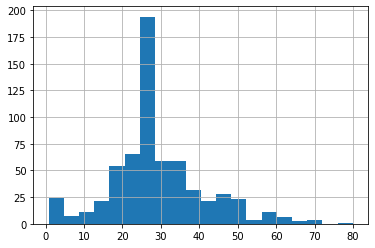

In [0]:
dftrain.age.hist(bins = 20)
plt.show()
# most passengers are around 20's or 30's 

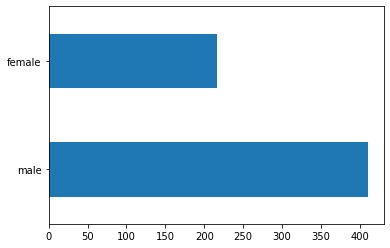

In [0]:
dftrain.sex.value_counts().plot(kind = 'barh')
plt.show()
# there are more male passengers than female 

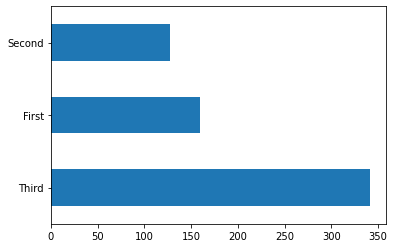

In [0]:
dftrain["class"].value_counts().plot(kind = 'barh')
plt.show()
# Most passengers are in the third class

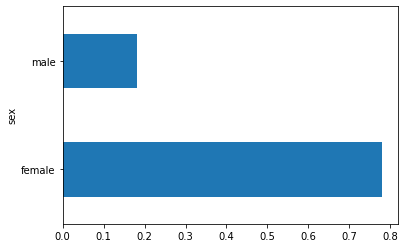

In [0]:
pd.concat([dftrain, y_train], axis = 1).groupby('sex').survived.mean().plot(kind = 'barh')
plt.show()
# female have more chanve to survive than male 

# Feature Columns
Before we continue and create/train a model we must convet our categorical data into numeric data. We can do this by encoding each category with an integer (ex. male = 1, female = 2).

In [0]:
categrical_columns = ['sex', 'n_siblings_spouses', 'parch', 'class', 
                      'deck', 'embark_town', 'alone']
numeric_columns = ['age', 'fare']

feature_columns = []
for feature_name in categrical_columns:
  vocabulary = dftrain[feature_name].unique()
  # get a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in numeric_columns:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

# The training process
For this specific model data is going to be streamed into it in small batches of 32. This means we will not feed the entire dataset to our model at once, but simply small batches of entries. We will feed these batches to our model multiple times according to the number of **epochs**.

An epoch is simply one stream of our entire dataset. The number of epochs we define is the amount of times our model will see the entire dataset. We use multiple epochs in hope that after seeing the same data multiple times the model will better determine how to estimate it.

Ex. if we have 10 ephocs, our model will see the same dataset 10 times.

Since we need to feed our data in batches and multiple times, we need to create something called an **input function**. The input function simply defines how our dataset will be converted into batches at each epoch.



# Input Function
Below you'll see a seemingly complicated input function, this is straight from the TensorFlow documentation (https://www.tensorflow.org/tutorials/estimator/linear).

In [0]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

# Creating the model

In [0]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp7apry67q', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Training the model

In [0]:
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result['accuracy'])

0.7462121


We can use the `.predict()` method to get survival probabilities from the model. This method will return a list of dicts that store a predicition for each of the entries in our testing data set. Below we've used some pandas magic to plot a nice graph of the predictions.

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7apry67q/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


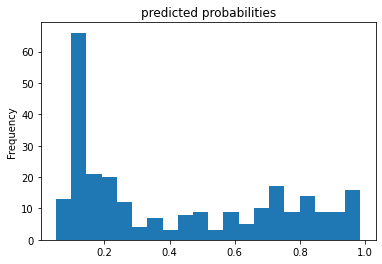

In [0]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind = 'hist', bins = 20, title = 'predicted probabilities')
plt.show()
# the survival rate is not very high 

# Classification
classification is used to seperate data points into classes of different labels. In this example we will use a TensorFlow estimator to classify flowers.

In [0]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import pandas as pd

# Data set 


In [0]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# define some constants to help us later on

train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)


8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [0]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [0]:
train_y = train.pop('Species')# pop 'Species' column, using it as test column 
test_y = test.pop('Species')

train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [0]:
train.shape

(120, 4)

# Input Function

In [0]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

# Feature Columns 

In [0]:
my_feature_coulumns = []
for key in train.keys():
  my_feature_coulumns.append(tf.feature_column.numeric_column(key = key))
print(my_feature_coulumns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


# Building the model
`DNNClassifier` Deep neural network

In [0]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns = my_feature_coulumns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units = [30, 10],
    # The model must choose between 3 classes.
    n_classes = 3
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpv3xmfsxg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Training

In [0]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpv3xmfsxg/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.5565261, step = 0
INFO

# Evaluate the results

In [0]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-03T14:34:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpv3xmfsxg/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.23548s
INFO:tensorflow:Finished evaluation at 2020-04-03-14:34:22
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.9, average_loss 

# Prediction 

In [0]:
def input_fn(features, batch_size = 256):
  return tf.data.Dataset.from_tensor_slices(dict(freatures).batch(batch_size))

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid :
    val = input (feature + ":")
    if not val.isdigit(): valid = False
  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))

expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

Please type numeric values as prompted.


KeyboardInterrupt: ignored

# Clustering
Clustering is a Machine Learning technique that involves the grouping of data points. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.

## Basic Algorithm for K-Means.
Step 1: Randomly pick K points to place K centroids

Step 2: Assign all the data points to the centroids by distance. The closest centroid to a point is the one it is assigned to.

Step 3: Average all the points belonging to each centroid to find the middle of those clusters (center of mass). Place the corresponding centroids into that position.

Step 4: Reassign every point once again to the closest centroid.

Step 5: Repeat steps 3-4 until no point changes which centroid it belongs to.

# Hidden Markov Model
The Hidden Markov Model is a finite set of states, each of which is associated with a (generally multidimensional) probability distribution.

A hidden markov model works with probabilities to predict future events or states.

In the previous sections we worked with large datasets of 100's of different entries. For a markov model we are only interested in probability distributions that have to do with states.

**States:** In each markov model we have a finite set of states. These states could be something like "warm" and "cold" or "high" and "low" or even "red", "green" and "blue". These states are "hidden" within the model, which means we do not direcly observe them.

**Observations:** Each state has a particular outcome or observation associated with it based on a probability distribution.

**Transitions:** Each state will have a probability defining the likelyhood of transitioning to a different state. 

To create a hidden markov model we need.
1. States
2. Observation Distribution
3. Transition Distribution


# Imports and set up

In [0]:
%tensorflow_version 2.x 
!pip install tensorflow_probability==0.8.0rc0 --user --upgrade # We are using a different module from tensorflow this time
import tensorflow_probability as tfp
import tensorflow as tf

Requirement already up-to-date: tensorflow_probability==0.8.0rc0 in /root/.local/lib/python3.6/site-packages (0.8.0rc0)


# Weather model 
We will model a simple weather system and try to predict the temperature on each day given the following information.

1. Cold days are encoded by a 0 and hot days are encoded by a 1.
2. The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.

In [0]:
tfd = tfp.distributions
initial_distribution = tfd.Categorical(probs = [0.2, 0.8]) # Refer to point 2 above
transition_distribution = tfd.Categorical(probs = [[0.5, 0.5],
                                                 [0.2, 0.8]]) # refer to points 3 and 4 above
observation_distribution = tfd.Normal(loc = [0., 15.], scale = [5., 10.])
# the loc argument represents the mean and the scale is the standard deviation

## Create the hidden Marko Model

In [0]:
model = tfd.HiddenMarkovModel(
    initial_distribution = initial_distribution,
    transition_distribution = transition_distribution,
    observation_distribution = observation_distribution,
    num_steps = 7
)

The number of steps represents the number of days that we would like to predict information for. In this case we've chosen 7, an entire week.

To get the expected temperatures on each day we can do the following.

In [0]:
mean = model.mean()
with tf.compat.v1.Session() as sess:
  print(mean.numpy())

[12.       11.1      10.83     10.748999 10.724699 10.71741  10.715222]
